# 1. Dataset Preparation & Analysis
### In this part, the dataset will be prepared and analysed using various graphical representations.

## 1.0 Imports
Necessary imports for the project, which are primarily: *sklearn*, *numpy*, *pandas*, *gensim*, *nltk*, *json*, and *matplotlib*.

In [3]:
from statistics import mode
from regex import P
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import gensim
import gensim.downloader
import nltk
import warnings
from nltk.tokenize import word_tokenize

import gzip
import json
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## 1.01 Auxiliary Variables
Definitions of auxiliary variables in order to better structurize the code. In fact, there is only one, which is called models: a dictionary, that will hold all the statistical information with regards to each model trained in this project.

In [4]:
models = {
    'BASE Multinomial Naive Bayes Classifier': 
        { 
            'Sentiments': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }, 
            'Emotions': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }
            },
    'BASE Decision Tree Classifier': 
        {
            'Sentiments': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }, 
            'Emotions': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }
            },
    'BASE Multi-Layered Perceptron Classifier': 
        {
            'Sentiments': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }, 
            'Emotions': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }
            },
    'TOP Multinomial Naive Bayes Classifier': 
        {
            'Sentiments': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }, 
            'Emotions': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }
            },
    'TOP Decision Tree Classifier': 
        {
            'Sentiments': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }, 
            'Emotions': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }
            },
    'TOP Multi-Layered Perceptron Classifier': 
        {
            'Sentiments': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }, 
            'Emotions': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }
            },
    'BASE Multi-Layered Perceptron Classifier (EMBEDDINGS)': 
        {
            'Sentiments': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }, 
            'Emotions': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }
            },
    'TOP Multi-Layered Perceptron Classifier (EMBEDDINGS)': 
        {
            'Sentiments': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }, 
            'Emotions': {
                'Parameters': {},
                'Confusion_Matrix': {},
                'Classification_Report': {},
                'Accuracy': 0,
                'Macro_Average_F1': 0,
                'Weighted_Average_F1': 0
            }
            }
        }

## 1.02 Auxiliary Functions
Definitions of auxiliary functions in order to better structurize the code.

In [5]:
def update_models_info(models, model_sentiments, model_emotions, model_name, y_true_sentiments, y_pred_sentiments, y_true_emotions, y_pred_emotions):
    """
    Update "models" dictionary with the information of the provided model

    :models:             dictionary that contains all information about the models
    :model_sentiments:   trained model that predicts sentiments
    :model_emotions:     trained model that predicts emotions
    :model_name:         name of the model, used to find the entry of the dictionary
    :y_true_sentiments:  true values of Y for sentiments
    :y_pred_sentiments:  predicted values of Y for sentiments
    :y_true_emotions:    true values of Y for emotions
    :y_pred_emotions:    predicted values of Y for emotions
    :return:             void
    """ 
    models[model_name]['Sentiments'].update(Parameters = model_sentiments.get_params())
    models[model_name]['Sentiments'].update(Confusion_Matrix = confusion_matrix(y_true_sentiments, y_pred_sentiments).tolist())
    models[model_name]['Sentiments'].update(Classification_Report = classification_report(y_true_sentiments, y_pred_sentiments))
    models[model_name]['Sentiments'].update(Accuracy = accuracy_score(y_true_sentiments, y_pred_sentiments))
    models[model_name]['Sentiments'].update(Macro_Average_F1 = f1_score(y_true_sentiments, y_pred_sentiments, average='macro'))
    models[model_name]['Sentiments'].update(Weighted_Average_F1 = f1_score(y_true_sentiments, y_pred_sentiments, average='weighted'))
    models[model_name]['Emotions'].update(Parameters = model_emotions.get_params())
    models[model_name]['Emotions'].update(Confusion_Matrix = confusion_matrix(y_true_emotions, y_pred_emotions).tolist())
    models[model_name]['Emotions'].update(Classification_Report = classification_report(y_true_emotions, y_pred_emotions))
    models[model_name]['Emotions'].update(Accuracy = accuracy_score(y_true_emotions, y_pred_emotions))
    models[model_name]['Emotions'].update(Macro_Average_F1 = f1_score(y_true_emotions, y_pred_emotions, average='macro'))
    models[model_name]['Emotions'].update(Weighted_Average_F1 = f1_score(y_true_emotions, y_pred_emotions, average='weighted'))

def train_base(model, X_train, Y_train, X_test):
    """
    Train base model with provided X_train and Y_train datasets

    :model:    model to train
    :X_train:  X data array which is passed to the model for training
    :Y_train:  Y data array which is passed to the model for training
    :X_test:   X data array which is passed to the model for testing
    :return:   trained base model, predictions on X_test of the model
    """
    base_model = model
    base_model.fit(X_train, Y_train)
    base_model_predictions = base_model.predict(X_test)
    return base_model, base_model_predictions

def train_top(base_model, parameters, X_train, Y_train, X_test):
    """
    Train top model with provided base model, X_train and Y_train datasets

    :base_model:  base model, based on which the top model will be trained
    :parameters:  set of hyperparameters, within which the best set is found using GridSearchSV
    :Y_train:     Y data array which is passed to the model for training
    :Y_train:     Y data array which is passed to the model for training
    :X_test:      X data array which is passed to the model for testing
    :return:      trained top model, predictions on X_test of the model
    """
    top_model = GridSearchCV(base_model, parameters)
    top_model.fit(X_train, Y_train)
    top_model_predictions = top_model.predict(X_test)
    return top_model, top_model_predictions

def phrases_against_model(phrases, model):
    """
    Compute the embedding of each phrase from phrases dataset

    :phrases: array of phrases, for which embeddings have to be computed 
    :model:   pre-trained model that provides embeddings for each word
    :return:  string of all phrases combined, embeddings of all phrases
    """
    reddit_post = ""
    phrases_tokens = np.zeros([len(phrases), len(model["good"])])
    index = 0
    for phrase in phrases:
        reddit_post += phrase + " "
        counter = 0
        for word in word_tokenize(phrase):
            word = word.lower()
            try:
                temp = model[word]
                phrases_tokens[index] += model[word]
                counter += 1
            except:
                  continue
        if(counter != 0):
            phrases_tokens[index] /= float(counter)
        index += 1
    return reddit_post, phrases_tokens

def compute_hit_rate(model, data_set):
    """
    Compute the overall hit rate of the data set against the model

    :model:   pre-trained model that provides embeddings for each word
    :data_set: array of phrases, for the words of which the hit rate is computed
    :return:  float hit rate in percents
    """
    vocab = set()
    non_vocab = set()
    for phrase in data_set:
        for word in phrase.split():
            word = word.lower()
            vocab.add(word)
            try:
                temp = model[word]
            except:
                if(word not in non_vocab):
                    non_vocab.add(word)
    return (float(len(vocab) - len(non_vocab))) * 100.0 / float(len(vocab))

## 1.1 Download GoEmotion Dataset
Download the dataset, which consists of 58k humman-annotated Reddit comments labeled with 27+1 emotion categories. Consecutively, the emotions are organized into 4 sentiments: *POSITIVE*, *NEGATIVE*, *AMBIGUOUS*, and *NEUTRAL*.

## 1.2 Load the Dataset
Use gzip.open and json.load in order to load the dataset.

In [6]:
with gzip.open("goemotions.json.gz", mode="rb") as f:
    emotions = np.asarray(json.load(f))

## 1.3 Extract Data & Plot Distributions
Extract the posts and labels of emotions and sentiments. Consecutively, plot the pie chart with regards to the distribution of sentiments, as well as the histogram with regards to the distribution of emotion categories. In order to achieve the latter-mentioned, matplotlib is utilized. 

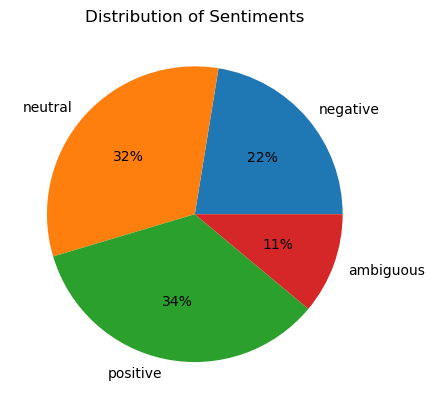

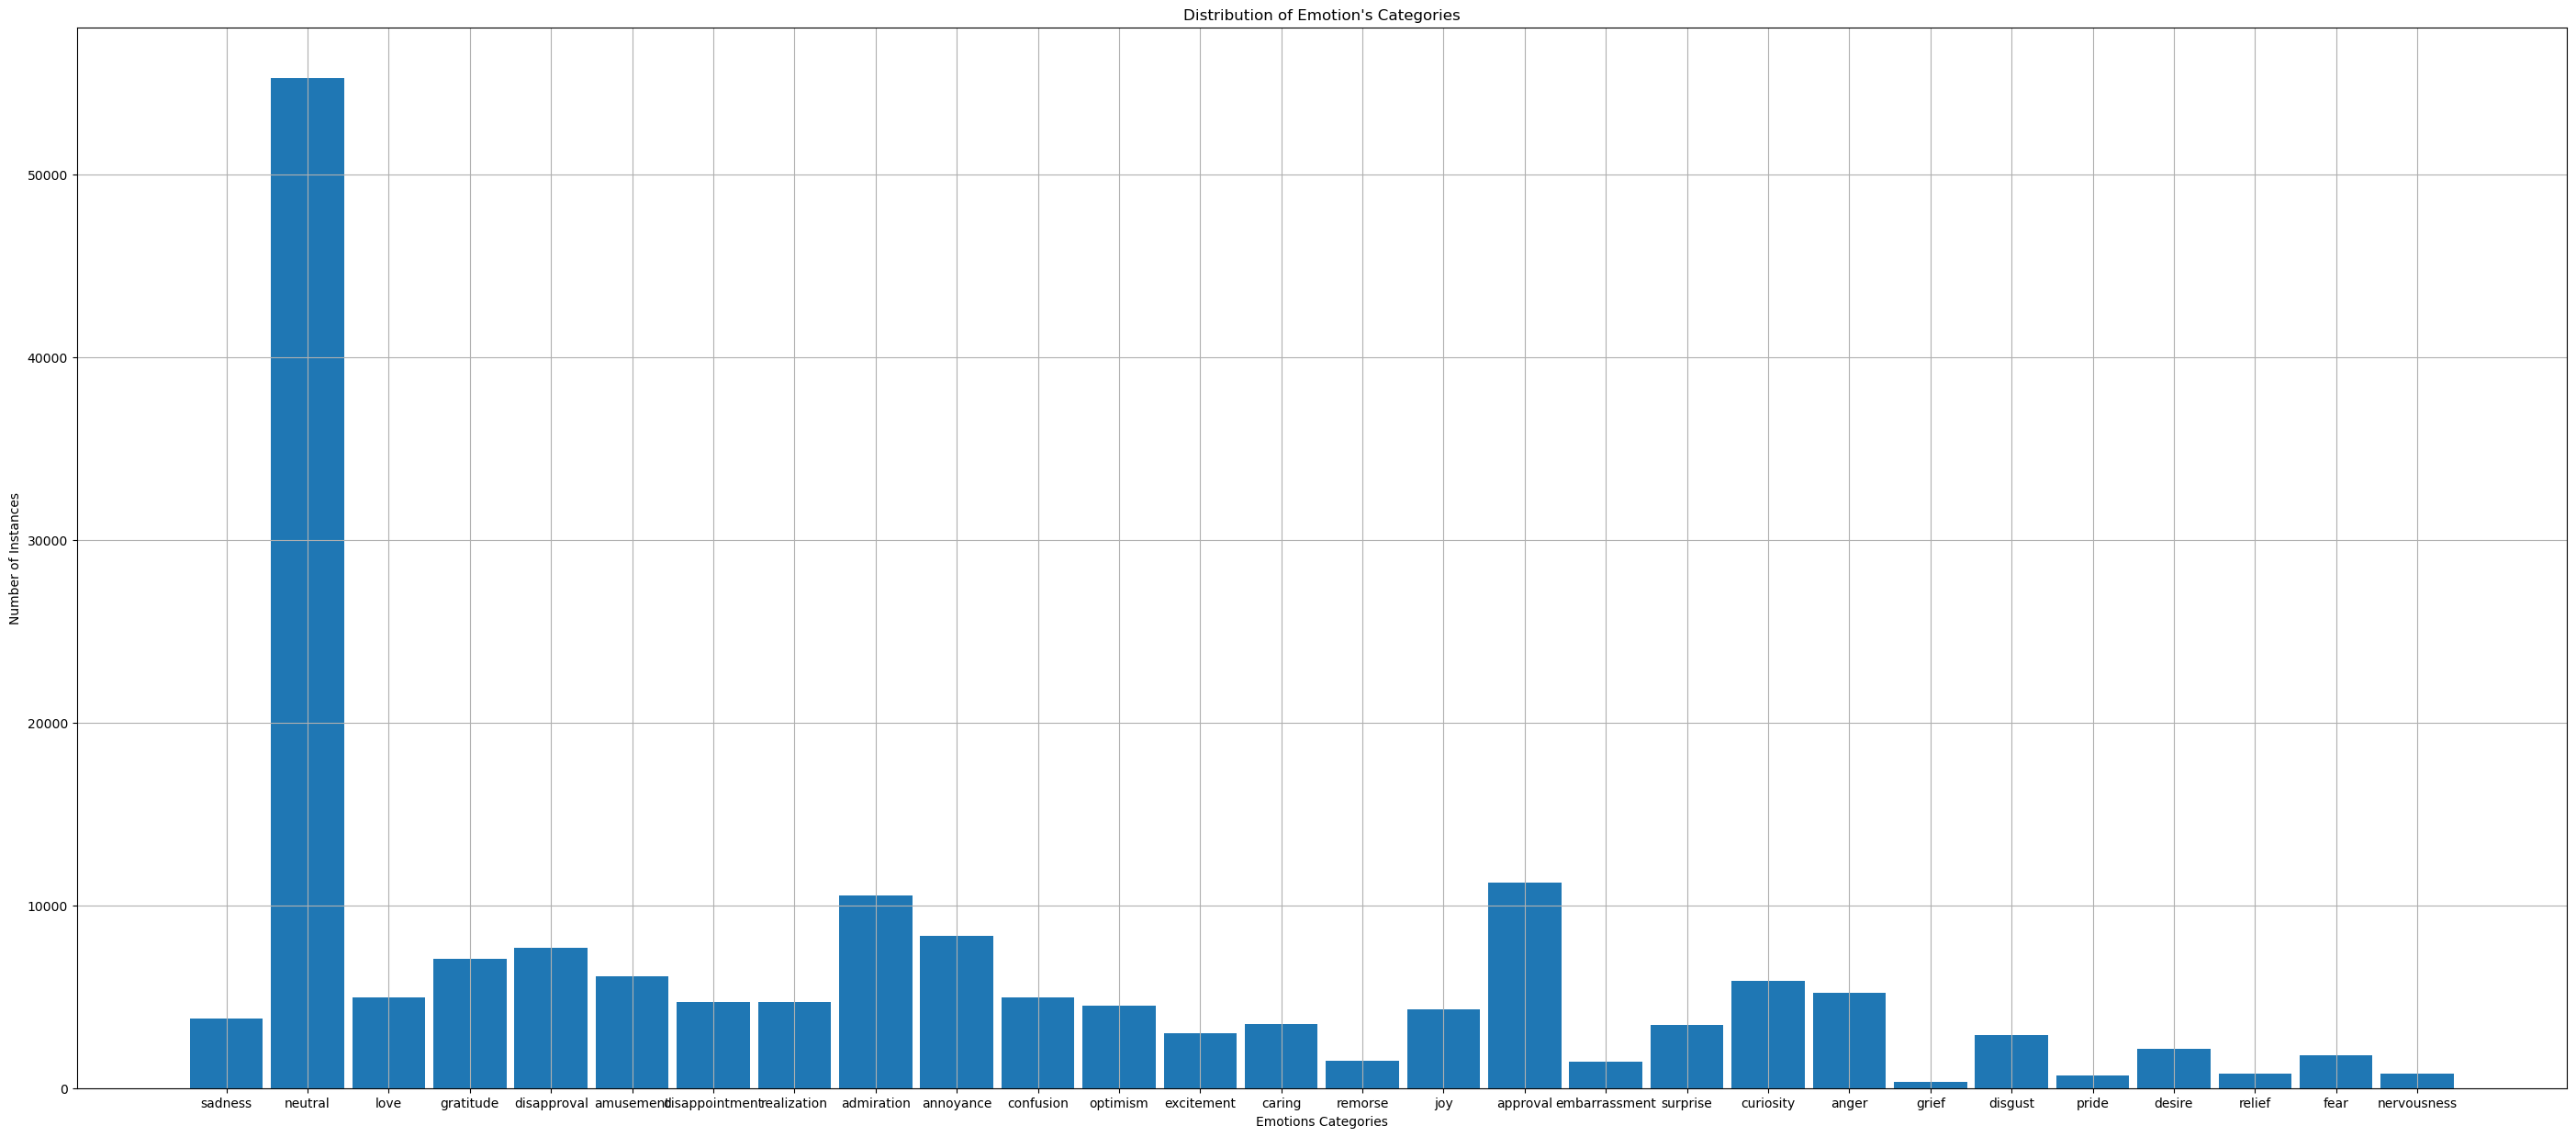

In [49]:
emotion_categories = {}
sentiments = {}
phrases = []
phrase_index = 0
emotion_index = 1
sentiment_index = 2

for elem in emotions:
    phrases.append(elem[phrase_index])
    if(elem[emotion_index] not in emotion_categories.keys()):
        emotion_categories.update({elem[emotion_index] : 1})
    else:
        emotion_categories.__setitem__(elem[emotion_index], emotion_categories[elem[emotion_index]] + 1)
    if(elem[sentiment_index] not in sentiments.keys()):
        sentiments.update({elem[sentiment_index] : 1})
    else:
        sentiments.__setitem__(elem[sentiment_index], sentiments[elem[sentiment_index]] + 1)
phrases = np.asarray(phrases)

fig_sentiments, ax_sentiments = plt.subplots()
ax_sentiments.pie(sentiments.values(), labels = sentiments.keys(), autopct="%.0f%%")
ax_sentiments.set_title("Distribution of Sentiments")

fig_emotions, ax_emotions = plt.subplots()
fig_emotions.set_size_inches(35, 15)
ax_emotions.bar(emotion_categories.keys(), emotion_categories.values(), width=0.9)
ax_emotions.set_title("Distribution of Emotion's Categories")
ax_emotions.set_xlabel("Emotions Categories")
ax_emotions.set_ylabel("Number of Instances")
ax_emotions.grid(True)

plt.show()

fig_sentiments.savefig("sentiments_pie_chart.pdf")
fig_emotions.savefig("emotions_histogram.pdf")

# 2. Words as Features
### In this part, classic *word as features* approach is used for text classification.

## 2.1 Process the Dataset & Extract Tokens & Frequencies
Process the dataset using CountVectorizer in order to extract tokens and their frequencies. The size of the vocabulary (number of tokens) in the dataset is displayed. 

In [8]:
vectorizer = CountVectorizer(dtype=np.uint8)
X = vectorizer.fit_transform(phrases)
print("-----VOCABULARY-----")
print("LENGTH: {}".format(len(vectorizer.get_feature_names_out())))

-----VOCABULARY-----
LENGTH: 30449


## 2.2 Split the Dataset into Training & Testing
Split the dataset into 80% for training and 20% for testing. In order to achieve the previously-mentioned, train_test_split function is utilized.

In [9]:
size_of_data_set = len(emotions)
sentiments_X_train, sentiments_X_test, sentiments_Y_train, sentiments_Y_test = train_test_split(
    X, np.asarray([elem[sentiment_index] for elem in emotions]), train_size=0.8, test_size=0.2
    )

emotions_X_train, emotions_X_test, emotions_Y_train, emotions_Y_test = train_test_split(
    X, np.asarray([elem[emotion_index] for elem in emotions]), train_size=0.8, test_size=0.2
    )

## 2.3 Train & Test Classifiers
Train and test the following classifiers: *Base-MNB*, *Base-DT*, *Base-MLP*, *Top-MNB*, *Top-DT*, and *Top-MLP* - for both the emotion and sentiment classification, using word frequency as features. After training of each classification type, recall score is displayed, as well as *models* dictionary is updated with all the information of the trained models.

### 2.3.1 Base-MNB
Multinomial Naive Bayes Classifier with default parameters.

In [10]:
base_mnb_sentiments, base_mnb_sentiments_predictions = train_base(MultinomialNB(), sentiments_X_train, sentiments_Y_train, sentiments_X_test)
print("//BASE MULTINOMIAL MB\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test, base_mnb_sentiments_predictions, average='weighted')))

base_mnb_emotions, base_mnb_emotions_predictions = train_base(MultinomialNB(), emotions_X_train, emotions_Y_train, emotions_X_test)
print("//BASE MULTINOMIAL MB\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test, base_mnb_emotions_predictions, average='weighted')))

update_models_info(models, base_mnb_sentiments, base_mnb_emotions, 'BASE Multinomial Naive Bayes Classifier', sentiments_Y_test, base_mnb_sentiments_predictions, emotions_Y_test, base_mnb_emotions_predictions)


//BASE MULTINOMIAL MB\\ SENTIMENTS SCORE: 0.548771970666977
//BASE MULTINOMIAL MB\\ EMOTIONS SCORE: 0.3810964963333721


### 2.3.2 Base-DT
Decision Tree Classifier with default parameters.

In [11]:
base_dt_sentiments, base_dt_sentiments_predictions = train_base(DecisionTreeClassifier(), sentiments_X_train, sentiments_Y_train, sentiments_X_test)
print("//BASE DECISION TREE\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test, base_dt_sentiments_predictions, average='weighted')))

base_dt_emotions, base_dt_emotions_predictions = train_base(DecisionTreeClassifier(), emotions_X_train, emotions_Y_train, emotions_X_test)
print("//BASE DECISION TREE\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test, base_dt_emotions_predictions, average='weighted')))

update_models_info(models, base_dt_sentiments, base_dt_emotions, 'BASE Decision Tree Classifier', sentiments_Y_test, base_dt_sentiments_predictions, emotions_Y_test, base_dt_emotions_predictions)

//BASE DECISION TREE\\ SENTIMENTS SCORE: 0.5438831335118147
//BASE DECISION TREE\\ EMOTIONS SCORE: 0.3587184262600396


### 2.3.3 Base-MLP
Multi-Layered Perceptron Classifier with default parameters.

In [12]:
base_mlp_sentiments, base_mlp_sentiments_predictions = train_base(MLPClassifier(max_iter=1), sentiments_X_train, sentiments_Y_train, sentiments_X_test)
print("//BASE MLP\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test, base_mlp_sentiments_predictions, average='weighted')))

base_mlp_emotions, base_mlp_emotions_predictions = train_base(MLPClassifier(max_iter=1), emotions_X_train, emotions_Y_train, emotions_X_test)
print("//BASE MLP\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test, base_mlp_emotions_predictions, average='weighted')))

update_models_info(models, base_mlp_sentiments, base_mlp_emotions, 'BASE Multi-Layered Perceptron Classifier', sentiments_Y_test, base_mlp_sentiments_predictions, emotions_Y_test, base_mlp_emotions_predictions)

//BASE MLP\\ SENTIMENTS SCORE: 0.5740600628564777
//BASE MLP\\ EMOTIONS SCORE: 0.4349319054824817


### 2.3.4 Top-MNB
Better performing Multinomial Naive Bayes Classifier found using GridSearchCV, which allows to find the best combination of hyper-parameters. The only hyper-parameter that is searched for MNB is *alphafloat*.

In [13]:
mnb_parameters = {'alpha': [0.5, 0.1, 0.001, 0]}

top_mnb_sentiments, top_mnb_sentiments_predictions = train_top(base_mnb_sentiments, mnb_parameters, sentiments_X_train, sentiments_Y_train, sentiments_X_test)
print("//TOP MULTINOMIAL MB\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test, top_mnb_sentiments_predictions, average='weighted')))

top_mnb_emotions, top_mnb_emotions_predictions = train_top(base_mnb_emotions, mnb_parameters, emotions_X_train, emotions_Y_train, emotions_X_test)
print("//TOP MULTINOMIAL MB\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test, top_mnb_emotions_predictions, average='weighted')))

update_models_info(models, top_mnb_sentiments, top_mnb_emotions, 'TOP Multinomial Naive Bayes Classifier', sentiments_Y_test, top_mnb_sentiments_predictions, emotions_Y_test, top_mnb_emotions_predictions)

//TOP MULTINOMIAL MB\\ SENTIMENTS SCORE: 0.5467349551856594
//TOP MULTINOMIAL MB\\ EMOTIONS SCORE: 0.3893609591432895


### 2.3.5 Top-DT
Better performing Decision Tree Classifier found using GridSearchCV, which allows to find the best combination of hyper-parameters. The hyper-parameters that are searched for DT are: *criterion*, *max_depth*, and *min_samples_split*.

In [14]:
dt_parameters = {'criterion': ['gini', 'entropy'], 'max_depth': [7, 13], 'min_samples_split': [2, 5, 7]}

top_dt_sentiments, top_dt_sentiments_predictions = train_top(base_dt_sentiments, dt_parameters, sentiments_X_train, sentiments_Y_train, sentiments_X_test)
print("//TOP DT\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test, top_dt_sentiments_predictions, average='weighted')))

top_dt_emotions, top_dt_emotions_predictions = train_top(base_dt_emotions, dt_parameters, emotions_X_train, emotions_Y_train, emotions_X_test)
print("//TOP DT\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test, top_dt_emotions_predictions, average='weighted')))

update_models_info(models, top_dt_sentiments, top_dt_emotions, 'TOP Decision Tree Classifier', sentiments_Y_test, top_dt_sentiments_predictions, emotions_Y_test, top_dt_emotions_predictions)

//TOP DT\\ SENTIMENTS SCORE: 0.43874403445466187
//TOP DT\\ EMOTIONS SCORE: 0.3940460947503201


### 2.3.6 Top-MLP
Better performing Multinomial Naive Bayes Classifier found using GridSearchCV, which allows to find the best combination of hyper-parameters. The hyper-parameters that are searched for MLP are: *activation*, *hidden_layer_sizes*, and *solver*.

In [15]:
mlp_parameters = {'activation': ['softmax', 'tanh', 'relu', 'identity'], 'hidden_layer_sizes': [(30, 50), (10, 10, 10)], 'solver': ['adam', 'sgd']}

top_mlp_sentiments, top_mlp_sentiments_predictions = train_top(base_mlp_sentiments, mlp_parameters, sentiments_X_train, sentiments_Y_train, sentiments_X_test)
print("//TOP MLP\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test, top_mlp_sentiments_predictions, average='weighted')))

top_mlp_emotions, top_mlp_emotions_predictions = train_top(base_mlp_emotions, mlp_parameters, emotions_X_train, emotions_Y_train, emotions_X_test)
print("//TOP MLP\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test, top_mlp_emotions_predictions, average='weighted')))

update_models_info(models, top_mlp_sentiments, top_mlp_emotions, 'TOP Multi-Layered Perceptron Classifier', sentiments_Y_test, top_mlp_sentiments_predictions, emotions_Y_test, top_mlp_emotions_predictions)

//TOP MLP\\ SENTIMENTS SCORE: 0.5704225352112676
//TOP MLP\\ EMOTIONS SCORE: 0.43193458270282853


## 2.4 Produce & Save Analytics
For each of the previously-trained classifiers and for each of the classification tasks, produce and save all analytical information (that is stored in *models* dictionary) in a file called performance.

In [16]:
with open('performance.txt', 'w') as f:
    for model in models.keys():
        if("EMBEDDINGS" in str(model)):
            continue
        f.write("[" + model + "]\n")
        for classification_category in models[model].keys():
            f.write("\t--" + classification_category + "--\n")
            for parameter in models[model][classification_category].keys():
                f.write("\t\t\t" + parameter + ": ") 
                if(parameter == "Classification_Report"):
                    f.write("\n{}\n".format(models[model][classification_category][parameter]))
                elif(parameter == "Confusion_Matrix"):
                    f.write("\n")
                    matrix = models[model][classification_category][parameter]
                    for i in range(0, len(matrix)):
                        f.write("\t\t\t\t[")
                        for j in range(0, len(matrix[i])):
                            f.write(str(matrix[i][j]))
                            if(j != len(matrix[i]) - 1):
                                f.write(", ")
                        f.write("]")
                        if(i != len(matrix) - 1):
                            f.write(",")
                        f.write("\n")
                else:
                    f.write("{}\n".format(models[model][classification_category][parameter]))
        f.write("\n")

## 2.5 Remove Stop Words & Redo 2.3
For the purpose of exploration, remove stop words and redo all substeps of 2.3. Train and test again the following classifiers: *Base-MNB*, *Base-DT*, *Base-MLP*, *Top-MNB*, *Top-DT*, and *Top-MLP* - for both the emotion and sentiment classification, using word frequency as features, however, based on the dataset with removed stop words. After training of each classification type, recall score is displayed.

### 2.5.1 Process & Split the Dataset
Process the dataset using CountVectorizer in order to extract tokens and their frequencies. However, now, pass *stop_words='english'* parameter to the CountVectorizer in order to remove the stop words. The size of the vocabulary (number of tokens) in the dataset is displayed.  
Split the dataset into 80% for training and 20% for testing. In order to achieve the previously-mentioned, train_test_split function is utilized.

In [17]:
vectorizer_sw = CountVectorizer(dtype=np.uint8, stop_words='english')
X_sw = vectorizer_sw.fit_transform(phrases)
print("-----VOCABULARY-----")
print("LENGTH: {}".format(len(vectorizer_sw.get_feature_names_out())))

sentiments_X_train_sw, sentiments_X_test_sw, sentiments_Y_train_sw, sentiments_Y_test_sw = train_test_split(
    X_sw, np.asarray([elem[sentiment_index] for elem in emotions]), train_size=0.8, test_size=0.2
    )

emotions_X_train_sw, emotions_X_test_sw, emotions_Y_train_sw, emotions_Y_test_sw = train_test_split(
    X_sw, np.asarray([elem[emotion_index] for elem in emotions]), train_size=0.8, test_size=0.2
    )

-----VOCABULARY-----
LENGTH: 30148


### 2.5.3 Base-MNB
Multinomial Naive Bayes Classifier with default parameters.

In [18]:
base_mnb_sentiments_sw, base_mnb_sentiments_predictions_sw = train_base(MultinomialNB(), sentiments_X_train_sw, sentiments_Y_train_sw, sentiments_X_test_sw)
print("//BASE MULTINOMIAL MB\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test_sw, base_mnb_sentiments_predictions_sw, average='weighted')))

base_mnb_emotions_sw, base_mnb_emotions_predictions_sw = train_base(MultinomialNB(), emotions_X_train_sw, emotions_Y_train_sw, emotions_X_test_sw)
print("//BASE MULTINOMIAL MB\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test_sw, base_mnb_emotions_predictions_sw, average='weighted')))

//BASE MULTINOMIAL MB\\ SENTIMENTS SCORE: 0.5413223140495868
//BASE MULTINOMIAL MB\\ EMOTIONS SCORE: 0.3910196717495053


### 2.5.4 Base-DT
Decision Tree Classifier with default parameters.

In [21]:
base_dt_sentiments_sw, base_dt_sentiments_predictions_sw = train_base(DecisionTreeClassifier(), sentiments_X_train_sw, sentiments_Y_train_sw, sentiments_X_test_sw)
print("//BASE DECISION TREE\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test_sw, base_dt_sentiments_predictions_sw, average='weighted')))

base_dt_emotions_sw, base_dt_emotions_predictions_sw = train_base(DecisionTreeClassifier(), emotions_X_train_sw, emotions_Y_train_sw, emotions_X_test_sw)
print("//BASE DECISION TREE\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test_sw, base_dt_emotions_predictions_sw, average='weighted')))

//BASE DECISION TREE\\ SENTIMENTS SCORE: 0.5448143405889885
//BASE DECISION TREE\\ EMOTIONS SCORE: 0.36427656850192064


### 2.5.5 Base-MLP
Multi-Layered Perceptron Classifier with default parameters.

In [22]:
base_mlp_sentiments_sw, base_mlp_sentiments_predictions_sw = train_base(MLPClassifier(max_iter=1), sentiments_X_train_sw, sentiments_Y_train_sw, sentiments_X_test_sw)
print("//BASE MLP\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test_sw, base_mlp_sentiments_predictions_sw, average='weighted')))

base_mlp_emotions_sw, base_mlp_emotions_predictions_sw = train_base(MLPClassifier(max_iter=1), emotions_X_train_sw, emotions_Y_train_sw, emotions_X_test_sw)
print("//BASE MLP\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test_sw, base_mlp_emotions_predictions_sw, average='weighted')))

//BASE MLP\\ SENTIMENTS SCORE: 0.5662321033639856
//BASE MLP\\ EMOTIONS SCORE: 0.4392969386567338


### 2.5.6 Top-MNB
Better performing Multinomial Naive Bayes Classifier found using GridSearchCV, which allows to find the best combination of hyper-parameters. The only hyper-parameter that is searched for MNB is *alphafloat*.

In [23]:
top_mnb_sentiments_sw, top_mnb_sentiments_predictions_sw = train_top(base_mnb_sentiments_sw, mnb_parameters, sentiments_X_train_sw, sentiments_Y_train_sw, sentiments_X_test_sw)
print("//TOP MULTINOMIAL MB\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test_sw, top_mnb_sentiments_predictions_sw, average='weighted')))

top_mnb_emotions_sw, top_mnb_emotions_predictions_sw = train_top(base_mnb_emotions_sw, mnb_parameters, emotions_X_train_sw, emotions_Y_train_sw, emotions_X_test_sw)
print("//TOP MULTINOMIAL MB\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test_sw, top_mnb_emotions_predictions_sw, average='weighted')))

//TOP MULTINOMIAL MB\\ SENTIMENTS SCORE: 0.539838202770341
//TOP MULTINOMIAL MB\\ EMOTIONS SCORE: 0.39360959143289487


### 2.5.7 Top-DT
Better performing Decision Tree Classifier found using GridSearchCV, which allows to find the best combination of hyper-parameters. The hyper-parameters that are searched for DT are: *criterion*, *max_depth*, and *min_samples_split*.

In [24]:
top_dt_sentiments_sw, top_dt_sentiments_predictions_sw = train_top(base_dt_sentiments_sw, dt_parameters, sentiments_X_train_sw, sentiments_Y_train_sw, sentiments_X_test_sw)
print("//TOP DECISION TREE\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test_sw, top_dt_sentiments_predictions_sw, average='weighted')))

top_dt_emotions_sw, top_dt_emotions_predictions_sw = train_top(base_dt_emotions_sw, dt_parameters, emotions_X_train_sw, emotions_Y_train_sw, emotions_X_test_sw)
print("//TOP DECISION TREE\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test_sw, top_dt_emotions_predictions_sw, average='weighted')))

//TOP DECISION TREE\\ SENTIMENTS SCORE: 0.4377837271563264
//TOP DECISION TREE\\ EMOTIONS SCORE: 0.39960423699220116


### 2.5.8 Top-MLP
Better performing Multinomial Naive Bayes Classifier found using GridSearchCV, which allows to find the best combination of hyper-parameters. The hyper-parameters that are searched for MLP are: *activation*, *hidden_layer_sizes*, and *solver*.

In [25]:
top_mlp_sentiments_sw, top_mlp_sentiments_predictions_sw = train_top(base_mlp_sentiments_sw, mlp_parameters, sentiments_X_train_sw, sentiments_Y_train_sw, sentiments_X_test_sw)
print("//TOP MLP\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test, top_mlp_sentiments_predictions, average='weighted')))

top_mlp_emotions_sw, top_mlp_emotions_predictions_sw = train_top(base_mlp_emotions_sw, mlp_parameters, emotions_X_train_sw, emotions_Y_train_sw, emotions_X_test_sw)
print("//TOP MLP\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test_sw, top_mlp_emotions_predictions_sw, average='weighted')))

//TOP MLP\\ SENTIMENTS SCORE: 0.5704225352112676
//TOP MLP\\ EMOTIONS SCORE: 0.43539750902106855


# 3. Embeddings as Features
### In this part, instead of using classic word frequencies as features, we will use Word2Vec *embeddings* for text classification.

## 3.1 Load Word2Vec Pretrained Embedding Model
Use gensim.downloader.load in order to load the word2vec-google-news-300 pretrained embedding model. 

In [26]:
embeddings_model = gensim.downloader.load('word2vec-google-news-300')

## 3.3 Compute Embedding of Reddit Posts
Compute the embedding of a Reddit post as the average of the embeddings of its words. It is worth mentioning that in case a word does not have an embedding in Word2Vec, we skip it.

In [27]:
nltk.download('punkt')

reddit_post, phrases_tokens = phrases_against_model(phrases, embeddings_model)

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 3.2 Use Tokenizer to Extract Words
Use the tokenizer from nltk to extract words from the Reddit posts. Furthermore, the number of tokens in the set is displayed.

In [44]:
reddit_tokens = word_tokenize(reddit_post)
print("NUMBER OF TOKENS: {}".format(len(reddit_tokens)))

NUMBER OF TOKENS: 2641793


## 3.4 Compute & Display Hit Rates
Compute and display the overall hit rates of the training and test sets (i.e. the percentage of the words in the Reddit posts for which an embedding is found in Word2Vec).

In [28]:
sentiments_X_train_embed_temp, sentiments_X_test_embed_temp, sentiments_Y_train_embed_temp, sentiments_Y_test_embed_temp = train_test_split(
    phrases, [elem[sentiment_index] for elem in emotions], train_size=0.8, test_size=0.2
    )

print("The Hit Rate of the Training Set is: {0:.2f}%".format(compute_hit_rate(embeddings_model, sentiments_X_train_embed_temp)))
print("The Hit Rate of the Test Set is: {0:.2f}%".format(compute_hit_rate(embeddings_model, sentiments_X_test_embed_temp)))

The Hit Rate of the Training Set is: 36.88%
The Hit Rate of the Test Set is: 42.13%


Prepare the training and test sets for the purpose of training the models (X will be the embeddings of each phrase, while Y stays the same as with the training of models in part two).

In [29]:
sentiments_X_train_embed, sentiments_X_test_embed, sentiments_Y_train_embed, sentiments_Y_test_embed = train_test_split(
    phrases_tokens[0:size_of_data_set], [elem[sentiment_index] for elem in emotions][0:size_of_data_set], train_size=0.8, test_size=0.2
    )

emotions_X_train_embed, emotions_X_test_embed, emotions_Y_train_embed, emotions_Y_test_embed = train_test_split(
    phrases_tokens[0:size_of_data_set], [elem[emotion_index] for elem in emotions][0:size_of_data_set], train_size=0.8, test_size=0.2
    )

## 3.5 Train Base-MLP
Multi-Layered Perceptron with the default parameters.

In [30]:
base_mlp_sentiments_embed, base_mlp_sentiments_predictions_embed = train_base(MLPClassifier(max_iter=1), sentiments_X_train_embed, sentiments_Y_train_embed, sentiments_X_test_embed)
print("//BASE MLP\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test_embed, base_mlp_sentiments_predictions_embed, average='weighted')))

base_mlp_emotions_embed, base_mlp_emotions_predictions_embed = train_base(MLPClassifier(max_iter=1), emotions_X_train_embed, emotions_Y_train_embed, emotions_X_test_embed)
print("//BASE MLP\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test_embed, base_mlp_emotions_predictions_embed, average='weighted')))

update_models_info(models, base_mlp_sentiments_embed, base_mlp_emotions_embed, 'BASE Multi-Layered Perceptron Classifier (EMBEDDINGS)', sentiments_Y_test_embed, base_mlp_sentiments_predictions_embed, emotions_Y_test_embed, base_mlp_emotions_predictions_embed)

//BASE MLP\\ SENTIMENTS SCORE: 0.5195262483994878
//BASE MLP\\ EMOTIONS SCORE: 0.38330811314165986


## 3.6 Train Top-MLP
Better performing Multi-Layered Perceptron found with the hyperparameters utilized for part 2.5.8 (the hyper-parameters that are searched for MLP are: *activation*, *hidden_layer_sizes*, and *solver*).

In [31]:
top_mlp_sentiments_embed, top_mlp_sentiments_predictions_embed = train_top(base_mlp_sentiments_embed, mlp_parameters, sentiments_X_train_embed, sentiments_Y_train_embed, sentiments_X_test_embed)
print("//TOP MLP\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test_embed, top_mlp_sentiments_predictions_embed, average='weighted')))

top_mlp_emotions_embed, top_mlp_emotions_predictions_embed = train_top(base_mlp_sentiments_embed, mlp_parameters, emotions_X_train_embed, emotions_Y_train_embed, emotions_X_test_embed)
print("//TOP MLP\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test_embed, top_mlp_emotions_predictions_embed, average='weighted')))

update_models_info(models, top_mlp_sentiments_embed, top_mlp_emotions_embed, 'TOP Multi-Layered Perceptron Classifier (EMBEDDINGS)', sentiments_Y_test_embed, top_mlp_sentiments_predictions_embed, emotions_Y_test_embed, top_mlp_emotions_predictions_embed)

//TOP MLP\\ SENTIMENTS SCORE: 0.5204574554766617
//TOP MLP\\ EMOTIONS SCORE: 0.3805726923524619


## 3.7 Display & Add Analytics
Display the performance of our classifiers using metrics.classification_report.

In [32]:
print("//BASE MLP\\\\ SENTIMENTS CLASSIFICATION REPORT")
print(classification_report(sentiments_Y_test_embed, base_mlp_sentiments_predictions_embed))
print("//BASE MLP\\\\ EMOTIONS CLASSIFICATION REPORT")
print(classification_report(emotions_Y_test_embed, base_mlp_emotions_predictions_embed))
print("//TOP MLP\\\\ SENTIMENTS CLASSIFICATION REPORT")
print(classification_report(sentiments_Y_test_embed, top_mlp_sentiments_predictions_embed))
print("//TOP MLP\\\\ EMOTIONS CLASSIFICATION REPORT")
print(classification_report(sentiments_Y_test_embed, top_mlp_emotions_predictions_embed))

//BASE MLP\\ SENTIMENTS CLASSIFICATION REPORT
              precision    recall  f1-score   support

   ambiguous       0.43      0.05      0.08      3836
    negative       0.50      0.46      0.48      7722
     neutral       0.45      0.55      0.50     11063
    positive       0.60      0.68      0.64     11743

    accuracy                           0.52     34364
   macro avg       0.49      0.44      0.42     34364
weighted avg       0.51      0.52      0.50     34364

//BASE MLP\\ EMOTIONS CLASSIFICATION REPORT
                precision    recall  f1-score   support

    admiration       0.46      0.34      0.39      2116
     amusement       0.47      0.18      0.26      1249
         anger       0.36      0.08      0.13      1080
     annoyance       0.24      0.00      0.01      1642
      approval       0.65      0.00      0.01      2247
        caring       0.42      0.01      0.01       694
     confusion       0.33      0.00      0.01      1004
     curiosity       0.12 

Add all the analytics of the trained Base and Top MLP models to the performance file.

In [33]:
with open('performance.txt', 'a') as f:
    for model in models.keys():
        if("EMBEDDINGS" not in str(model)):
            continue
        f.write("[" + model + "]\n")
        for classification_category in models[model].keys():
            f.write("\t--" + classification_category + "--\n")
            for parameter in models[model][classification_category].keys():
                f.write("\t\t\t" + parameter + ": ") 
                if(parameter == "Classification_Report"):
                    f.write("\n{}\n".format(models[model][classification_category][parameter]))
                elif(parameter == "Confusion_Matrix"):
                    f.write("\n")
                    matrix = models[model][classification_category][parameter]
                    for i in range(0, len(matrix)):
                        f.write("\t\t\t\t[")
                        for j in range(0, len(matrix[i])):
                            f.write(str(matrix[i][j]))
                            if(j != len(matrix[i]) - 1):
                                f.write(", ")
                        f.write("]")
                        if(i != len(matrix) - 1):
                            f.write(",")
                        f.write("\n")
                else:
                    f.write("{}\n".format(models[model][classification_category][parameter]))
        f.write("\n")

## 3.8 Rerun With Other Embedding Models
For the purpose of exploration, rerun the best performing model (Base-MLP) with 2 other English pretrained embedding models, which were chosen to be: *glove-twitter-25*, and *glove-wiki-gigaword-100*.

### 3.8.1 Glove-Twitter-25
Rerun Base-MLP with glove-twitter-25 English pretrained embedding model.

#### 3.8.1.1 Glove-Twitter-25 Pretrained Embedding Model
Use gensim.downloader.load in order to load the glove-twitter-25 pretrained embedding model. 

In [34]:
glove_twitter = gensim.downloader.load("glove-twitter-25")

#### 3.8.1.2 Compute Embedding of Reddit Posts
Compute the embedding of a Reddit post as the average of the embeddings of its words. It is worth mentioning that in case a word does not have an embedding in Word2Vec, we skip it.

In [35]:
reddit_post_twitter, phrases_tokens_twitter = phrases_against_model(phrases, glove_twitter)

#### 3.8.1.3 Compute & Display Hit Rates
Compute and display the overall hit rates of the training and test sets (i.e. the percentage of the words in the Reddit posts for which an embedding is found in glove-twitter-25).

In [36]:
print("The Hit Rate of the Training Set is: {0:.2f}%".format(compute_hit_rate(glove_twitter, sentiments_X_train_embed_temp)))
print("The Hit Rate of the Test Set is: {0:.2f}%".format(compute_hit_rate(glove_twitter, sentiments_X_test_embed_temp)))

The Hit Rate of the Training Set is: 39.15%
The Hit Rate of the Test Set is: 44.05%


Prepare the training and test sets for the purpose of training the models (X will be the embeddings of each phrase, while Y stays the same as with the training of models in part two).

In [37]:
sentiments_X_train_twitter, sentiments_X_test_twitter, sentiments_Y_train_twitter, sentiments_Y_test_twitter = train_test_split(
    phrases_tokens_twitter[0:size_of_data_set], [elem[sentiment_index] for elem in emotions][0:size_of_data_set], train_size=0.8, test_size=0.2
    )

emotions_X_train_twitter, emotions_X_test_twitter, emotions_Y_train_twitter, emotions_Y_test_twitter = train_test_split(
    phrases_tokens_twitter[0:size_of_data_set], [elem[emotion_index] for elem in emotions][0:size_of_data_set], train_size=0.8, test_size=0.2
    )

#### 3.8.1.4 Train Base-MLP
Multi-Layered Perceptron with the default parameters.

In [38]:
base_mlp_sentiments_twitter, base_mlp_sentiments_predictions_twitter = train_base(MLPClassifier(max_iter=1), sentiments_X_train_twitter, sentiments_Y_train_twitter, sentiments_X_test_twitter)
print("//BASE MLP\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test_twitter, base_mlp_sentiments_predictions_twitter, average='weighted')))

base_mlp_emotions_twitter, base_mlp_emotions_predictions_twitter = train_base(MLPClassifier(max_iter=1), emotions_X_train_twitter, emotions_Y_train_twitter, emotions_X_test_twitter)
print("//BASE MLP\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test_twitter, base_mlp_emotions_predictions_twitter, average='weighted')))

//BASE MLP\\ SENTIMENTS SCORE: 0.4535269468047957
//BASE MLP\\ EMOTIONS SCORE: 0.34707833779536723


### 3.8.2 Glove-Wiki-Gigaword-100
Rerun Base-MLP with glove-wiki-gigaword-100 English pretrained embedding model.

#### 3.8.2.1 Glove-Wiki-Gigaword-100 Pretrained Embedding Model
Use gensim.downloader.load in order to load the glove-wiki-gigaword-100 pretrained embedding model. 

In [39]:
glove_wiki_gigaword = gensim.downloader.load("glove-wiki-gigaword-100")

#### 3.8.2.2 Compute Embedding of Reddit Posts
Compute the embedding of a Reddit post as the average of the embeddings of its words. It is worth mentioning that in case a word does not have an embedding in Word2Vec, we skip it.

In [40]:
reddit_post_wiki, phrases_tokens_wiki = phrases_against_model(phrases, glove_wiki_gigaword)

#### 3.8.2.3 Compute & Display Hit Rates
Compute and display the overall hit rates of the training and test sets (i.e. the percentage of the words in the Reddit posts for which an embedding is found in glove-twitter-25).

In [41]:
print("The Hit Rate of the Training Set is: {0:.2f}%".format(compute_hit_rate(glove_wiki_gigaword, sentiments_X_train_embed_temp)))
print("The Hit Rate of the Test Set is: {0:.2f}%".format(compute_hit_rate(glove_wiki_gigaword, sentiments_X_test_embed_temp)))

The Hit Rate of the Training Set is: 39.20%
The Hit Rate of the Test Set is: 44.11%


Prepare the training and test sets for the purpose of training the models (X will be the embeddings of each phrase, while Y stays the same as with the training of models in part two).

In [42]:
sentiments_X_train_wiki, sentiments_X_test_wiki, sentiments_Y_train_wiki, sentiments_Y_test_wiki = train_test_split(
    phrases_tokens_wiki[0:size_of_data_set], [elem[sentiment_index] for elem in emotions][0:size_of_data_set], train_size=0.8, test_size=0.2
    )

emotions_X_train_wiki, emotions_X_test_wiki, emotions_Y_train_wiki, emotions_Y_test_wiki = train_test_split(
    phrases_tokens_wiki[0:size_of_data_set], [elem[emotion_index] for elem in emotions][0:size_of_data_set], train_size=0.8, test_size=0.2
    )

#### 3.8.2.4 Train Base-MLP
Multi-Layered Perceptron with the default parameters.

In [43]:
base_mlp_sentiments_wiki, base_mlp_sentiments_predictions_wiki = train_base(MLPClassifier(max_iter=1), sentiments_X_train_wiki, sentiments_Y_train_wiki, sentiments_X_test_wiki)
print("//BASE MLP\\\\ SENTIMENTS SCORE: {}".format(recall_score(sentiments_Y_test_wiki, base_mlp_sentiments_predictions_wiki, average='weighted')))

base_mlp_emotions_wiki, base_mlp_emotions_predictions_wiki = train_base(MLPClassifier(max_iter=1), emotions_X_train_wiki, emotions_Y_train_wiki, emotions_X_test_wiki)
print("//BASE MLP\\\\ EMOTIONS SCORE: {}".format(recall_score(emotions_Y_test_wiki, base_mlp_emotions_predictions_wiki, average='weighted')))

//BASE MLP\\ SENTIMENTS SCORE: 0.4840239785822372
//BASE MLP\\ EMOTIONS SCORE: 0.36087184262600397
